In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
file_path = '../data/gym_members_exercise_tracking.csv'
data = pd.read_csv(file_path)

data.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


# Hypothesis 1
Men burn more calories per workout session than women on average. This hypothesis explores whether there is a significant difference in calorie expenditure between male and female gym members, giving insight into how gender might affect workout intensity or calorie burn.

C:\Users\nyuki\AppData\Local\Temp\ipykernel_19948\220820779.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Gender', y='Calories_Burned', palette='coolwarm')


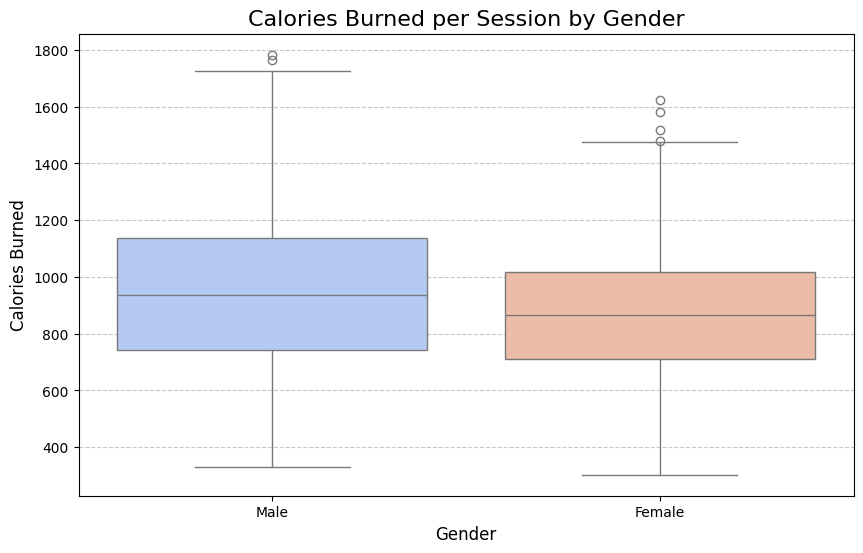

In [3]:
# compare calories burned by gender
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Gender', y='Calories_Burned', palette='coolwarm')
plt.title('Calories Burned per Session by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Calories Burned', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [7]:
# Group by Gender and calculate summary statistics for Calories_Burned
gender_calorie_stats = data.groupby('Gender')['Calories_Burned'].describe()

gender_calorie_stats

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,462.0,862.248918,249.614915,303.0,710.25,867.0,1016.0,1625.0
Male,511.0,944.455969,286.590987,331.0,742.00,937.0,1138.5,1783.0


/tmp/ipykernel_2573/3391124363.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Gender', y='Calories_Burned', palette='coolwarm', showmeans=True,


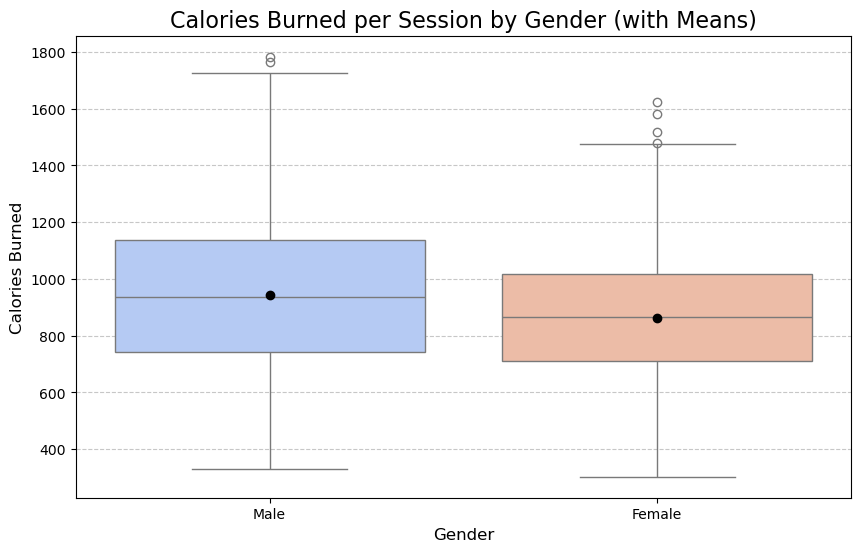

In [11]:
# Overlay mean values on the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Gender', y='Calories_Burned', palette='coolwarm', showmeans=True,
            meanprops={"marker": "o", "markerfacecolor": "black", "markeredgecolor": "black"})
plt.title('Calories Burned per Session by Gender (with Means)', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Calories Burned', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Hypothesis 2
Men and women show distinct preferences for different types of excercises. This hypothesis examines patterns in excercise habits linked to gender.

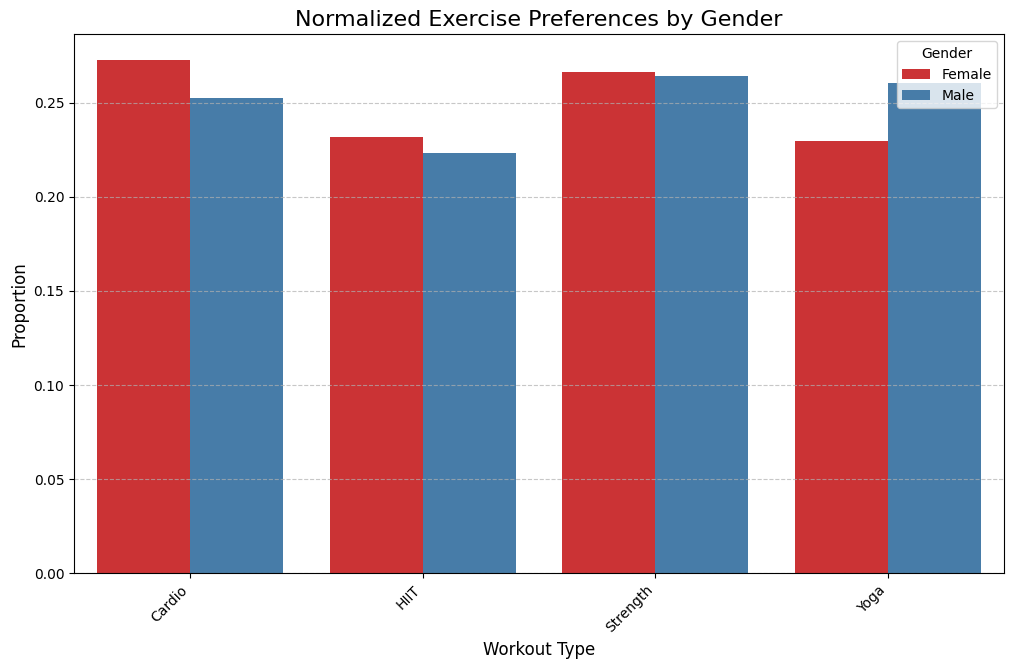

In [11]:

gender_totals = data['Gender'].value_counts().to_dict()

data['Total_Count'] = data['Gender'].map(gender_totals)
exercise_preferences = (
    data.groupby(['Gender', 'Workout_Type'])
    .size()
    .reset_index(name='Count')
)
exercise_preferences['Proportion'] = exercise_preferences['Count'] / exercise_preferences['Gender'].map(gender_totals)



plt.figure(figsize=(12, 7))
sns.barplot(data=exercise_preferences, x='Workout_Type', y='Proportion', hue='Gender', palette='Set1')
plt.title('Normalized Exercise Preferences by Gender', fontsize=16)
plt.xlabel('Workout Type', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


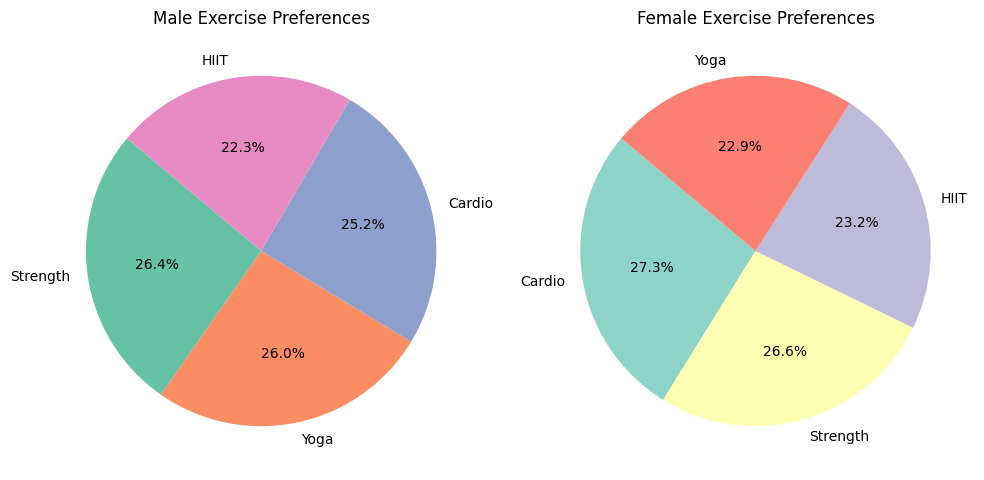

In [12]:
# Separate data for each gender
male_preferences = data[data['Gender'] == 'Male']['Workout_Type'].value_counts()
female_preferences = data[data['Gender'] == 'Female']['Workout_Type'].value_counts()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
male_preferences.plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2', len(male_preferences)))
plt.title('Male Exercise Preferences')
plt.ylabel('')

plt.subplot(1, 2, 2)
female_preferences.plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3', len(female_preferences)))
plt.title('Female Exercise Preferences')
plt.ylabel('')

plt.tight_layout()
plt.show()

In [8]:
exercise_summary = data.pivot_table(index='Workout_Type', columns='Gender', aggfunc='size', fill_value=0)

exercise_summary

Gender,Female,Male
Workout_Type,,
Cardio,126,129
HIIT,107,114
Strength,123,135
Yoga,106,133
